# Credit card fraud detection Task-5

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import KFold , cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [190]:
df= pd.read_csv('creditcard.csv')

In [191]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [193]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

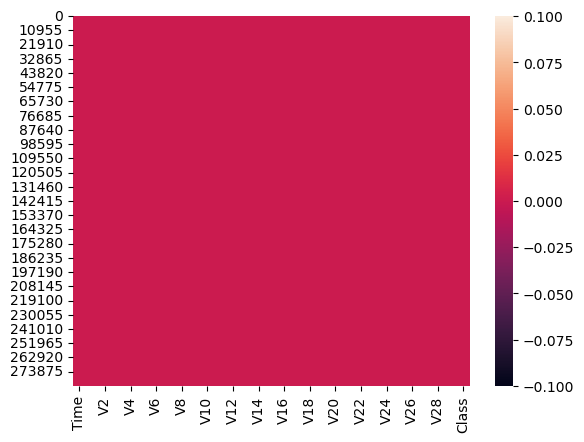

In [194]:
sns.heatmap(df.isnull())

In [195]:
X = df.drop(["Class"], axis=1)
y = df["Class"]

In [196]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [198]:
dt=tree.DecisionTreeClassifier(max_depth=5)

In [199]:
dt.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=5)

[Text(0.4609375, 0.9166666666666666, 'x[17] <= -2.769\ngini = 0.003\nsamples = 227845\nvalue = [227451, 394]'),
 Text(0.28125, 0.75, 'x[12] <= -1.925\ngini = 0.352\nsamples = 347\nvalue = [79, 268]'),
 Text(0.25, 0.5833333333333334, 'x[14] <= -3.43\ngini = 0.299\nsamples = 328\nvalue = [60, 268]'),
 Text(0.125, 0.4166666666666667, 'x[26] <= -0.225\ngini = 0.227\nsamples = 291\nvalue = [38, 253]'),
 Text(0.0625, 0.25, 'x[27] <= 1.175\ngini = 0.439\nsamples = 89\nvalue = [29, 60]'),
 Text(0.03125, 0.08333333333333333, 'gini = 0.2\nsamples = 62\nvalue = [7, 55]'),
 Text(0.09375, 0.08333333333333333, 'gini = 0.302\nsamples = 27\nvalue = [22, 5]'),
 Text(0.1875, 0.25, 'x[1] <= -31.413\ngini = 0.085\nsamples = 202\nvalue = [9, 193]'),
 Text(0.15625, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.21875, 0.08333333333333333, 'gini = 0.068\nsamples = 200\nvalue = [7, 193]'),
 Text(0.375, 0.4166666666666667, 'x[20] <= 0.312\ngini = 0.482\nsamples = 37\nvalue = [22, 15]'

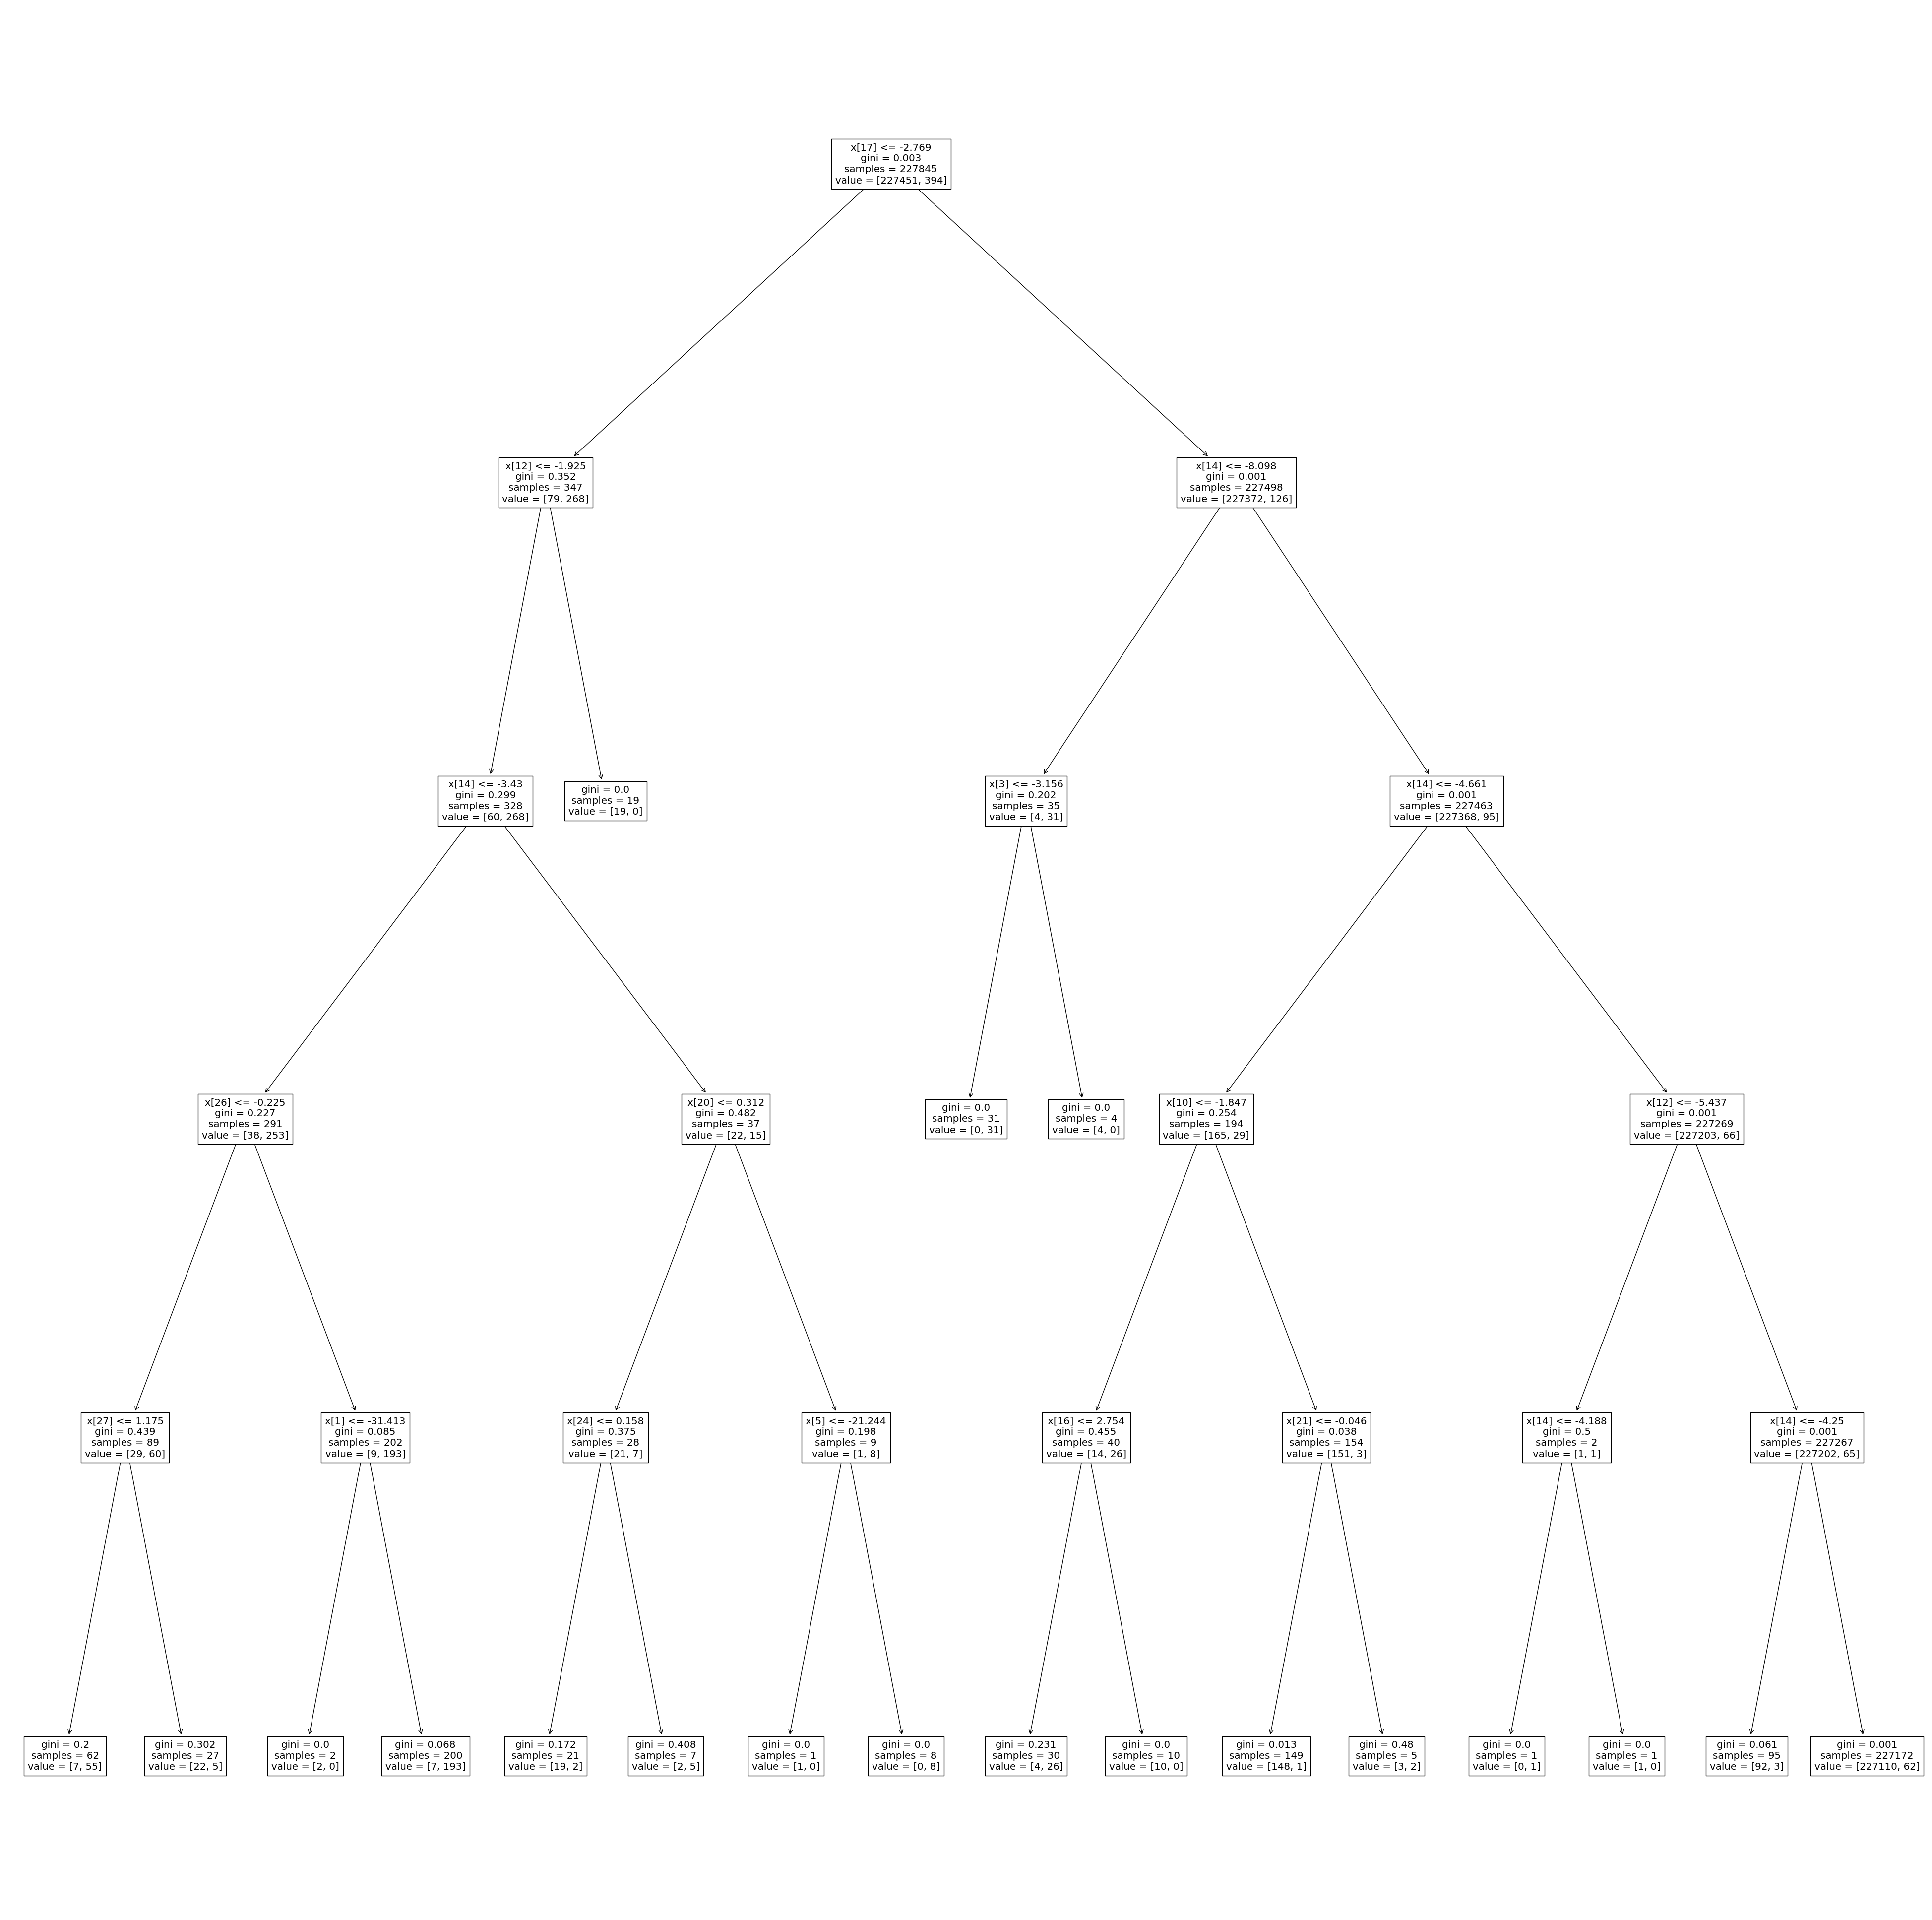

In [200]:
plt.figure(figsize=(50,50))
tree.plot_tree(dt)

In [201]:
y_pred = dt.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [202]:
accuracy=confusion_matrix(y_test,y_pred)
accuracy

array([[56856,     8],
       [   20,    78]], dtype=int64)

In [203]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.80      0.85        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



# ROC Curve

In [204]:
from sklearn.metrics import roc_curve, auc,roc_auc_score 

In [205]:
Prob=dt.predict_proba(X_test)[:,1]
Prob

array([8.87096774e-01, 2.72920959e-04, 2.72920959e-04, ...,
       2.72920959e-04, 2.72920959e-04, 2.72920959e-04])

# ROC score

In [206]:
dt_fpr,dt_tpr,_=roc_curve(y_test,Prob)

In [207]:
dt_tpr

array([0.        , 0.05102041, 0.51020408, 0.69387755, 0.79591837,
       0.79591837, 0.81632653, 0.82653061, 0.83673469, 0.84693878,
       1.        , 1.        ])

# AUC Score

In [208]:
dt_auc=roc_auc_score(y_test,Prob)
dt_auc

0.9232947856970588

# ROC Curve plot

Text(0.5, 0, 'False Positive Rate')

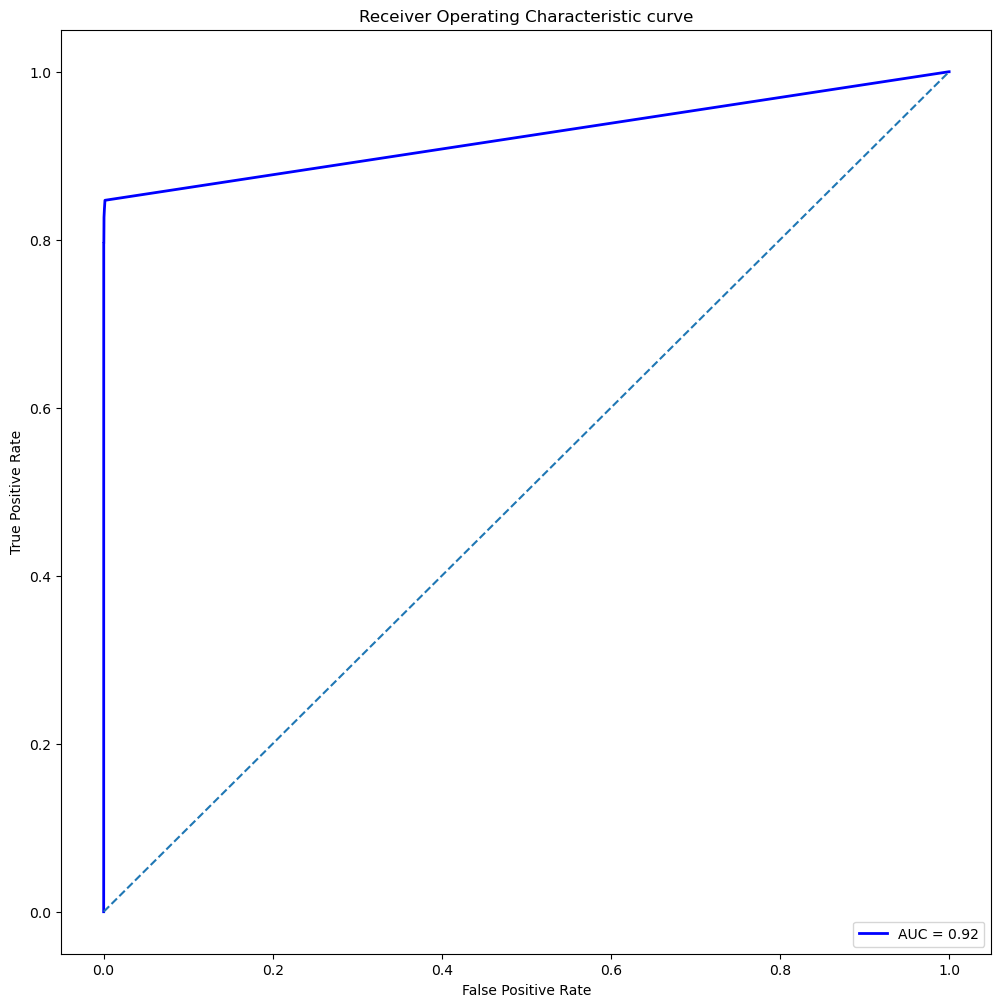

In [209]:
plt.figure(figsize=(12,12))
lw=2
plt.title('Receiver Operating Characteristic curve')
plt.plot(dt_fpr,dt_tpr, color='blue',lw=lw,label = 'AUC = %0.2f' % dt_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [210]:
from sklearn.linear_model import LinearRegression

In [211]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [212]:
model=LinearRegression().fit(X,y)
r_sq=model.score(X,y)
print('Accuracy:',r_sq)

Accuracy: 0.5216390655775354


In [213]:
importance = pd.DataFrame(data={'Attribute': X_train.columns,'Importance': model.coef_})
importance = importance.sort_values(by='Importance',ascending = False)

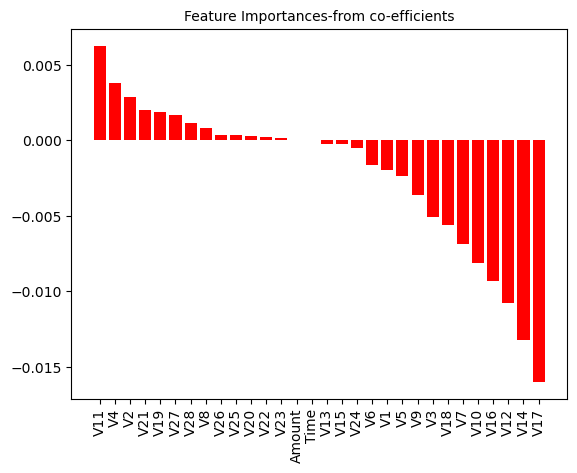

In [214]:
plt.bar(x=importance['Attribute'],height = importance['Importance'],color = 'red')
plt.title('Feature Importances-from co-efficients', size = 10)
plt.xticks(rotation = 'vertical')
plt.show()

# Classification-by gradient boosting classifier

In [215]:
from sklearn import ensemble

In [216]:
gb = ensemble.GradientBoostingClassifier(n_estimators=50)

In [217]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=50)

In [130]:
gb.score(X_test, y_test)

0.9989466661985184

# Random Forest

In [135]:
from sklearn import ensemble

In [136]:
random = ensemble.RandomForestClassifier(n_estimators=100)
random.fit(X_train, y_train)

RandomForestClassifier()

In [137]:
random.score(X_test, y_test)

0.9995611109160493

In [138]:
y_predRF=rf.predict(X_test)
y_predRF

NameError: name 'rf' is not defined

In [ ]:
print(classification_report(y_test,y_predRF))

In [ ]:
Prob_pred=rf.predict_proba(X_test)[:,1]
Prob_pred

# AUC Score

In [ ]:
r_auc=roc_auc_score(y_test,Prob_pred)
r_auc

# ROC Score

In [ ]:
r_fpr,r_tpr,_=roc_curve(y_test,Prob_pred)

# ROC Curve 

In [ ]:
plt.figure(figsize=(10,10))
lw=2
plt.title('Receiver Operating Characteristic curve')
plt.plot(r_fpr,r_tpr, color='red',lw=lw,label = 'AUC = %0.2f' % r_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
fi=pd.DataFrame({'feature':list(X_train.columns),
                 'importance':rf.feature_importances_}).\
                  sort_values('importance',ascending=False)

In [ ]:
fi

# Logistic Regression

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
logic=LogisticRegression(C=0.01)
logic.fit(X_train,y_train)
print(logic.score(X_train,y_train))
print(logic.score(X_test,y_test))

0.9989203186376704
0.9985779993679997


In [171]:
confuse = confusion_matrix(y_test , lr.predict(X_test))
confuse

array([[56831,    33],
       [   48,    50]], dtype=int64)

In [172]:
print (classification_report(y_test , random.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [173]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators =7 ,max_depth = 4,learning_rate=.3)
xgb.fit(X_train,y_train)
print(xgb.score(X_test, y_test))
print(xgb.score(X_train,y_train))

0.9995611109160493
0.9996137725207926


In [174]:
print (classification_report(y_test , xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [175]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators = 15, learning_rate=0.25)
ada.fit(X_train,y_train)
print(ada.score(X_test , y_test))
print(ada.score(X_train,y_train))

0.9991397773954567
0.9990827097368825


In [176]:
confuse = confusion_matrix(y_test,ada.predict(X_test) )
print(confuse)

[[56856     8]
 [   41    57]]


In [177]:
print (classification_report(y_test , ada.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.94      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [178]:
from sklearn.svm import SVC

In [179]:
clf=SVC(random_state =0)

In [180]:
clf.fit(X_train,y_train)

SVC(random_state=0)

In [184]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import accuracy_score,confusion_matrix

model = GaussianNB()

In [185]:
model.fit(X_train, y_train)
yGas = model.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test,yGas)*100}%" )

Accuracy score: 99.30128857835048%


# Find F1,Recall and Precision

In [187]:
precision = precision_score(y_test, yGas, average='weighted')
recall = recall_score(y_test, yGas, average='weighted')
f1 = f1_score(y_test, yGas, average='weighted')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
confusion = confusion_matrix(y_test, yGas)
print("Confusion Matrix:")
print(confusion)

Precision: 1.00
Recall: 0.99
F1-score: 1.00
Confusion Matrix:
[[56502   362]
 [   36    62]]


# End of program